In [1]:
from library.regression import LinearRegression
from library.selection import BackwardSelection
from library.selection import ForwardSelection
from library.selection import StepwiseSelection
from library.design_matrix import design_matrix
import pandas as pd
import altair as alt
import numpy as np
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
df = pd.DataFrame({'X1' : [1, 2, 2, 3, 3, 4, 5, 5, 5, 6, 7, 8, 8, 9, 9, 10, 11, 11, 11, 12],
                   'X2' : [-1, 2, 2, 2, 2, 7, 7, 8, 8, 8, 3, 4, 4, 5, 6, 9, 10, 10, 11, 12],
                   'X1c' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                   'X2c' : [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                   'y' : [-3, 7, 8, 5, 9, 20, 19, 19, 18, 20, 15, 15, 16, 18, 22, 32, 31, 34, 33, 37]})

# **Design Matrix**

In [3]:
dm = design_matrix(df, categorical = ['X1c', 'X2c'], interaction = [['X1c', 'X2'], ['X1c', 'X2c'], ['X2c', 'X1']], copy = True)

In [4]:
dm.head()

,Intercept,X1,X2,y,X1c_0,X2c_0,X1c_0_X2,X1c_0_X2c_0,X2c_0_X1
0,1.0,1,-1,-3,1,1,-1,1,1
1,1.0,2,2,7,1,1,2,1,2
2,1.0,2,2,8,1,1,2,1,2
3,1.0,3,2,5,1,1,2,1,3
4,1.0,3,2,9,1,1,2,1,3


# **Regression**

In [5]:
model = LinearRegression(df)

In [6]:
model.fit(['X1', 'X2'], 'y')

C:\Users\anson\Documents\statistical_analysis\library\design_matrix.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Intercept'] = np.ones(len(df))


In [7]:
model.summary(VIF = True)

Factor                                                 Coefficient         Pr(|t|>0)           VIF            
Intercept                                              -0.6413             0.5134                             
X1                                                     1.2186              0.0000              2.4789         
X2                                                     1.9073              0.0000              2.4789         
------------------------------------------------------------------------------------------------------------------------
Source            Sum of Square
Total S.S.        2155.7500 
Reg S.S.          2091.6149 
Res S.S.          64.1351   
F-value: 277.2075753562956
Pr(F): 1.0580425424677742e-13
------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9702493012675637
Adjusted R-squared: 0.9667492190637477
AIC: 29.30518071633432
BIC: 32.29237753699629
 


In [8]:
model.lack_of_fit()

Source              Sum of Square
Lack of Fit         50.1351   
Pure Error          14.0000   
F-value: 1.6277619737808313
Pr(Lack of Fit): 0.3082628542218757



In [9]:
model.hypothesis_testing([{'X1' : 1}], [0])

Test statistic: 36.32965154664765
Pr: 1.3586401357623679e-05


In [10]:
model.predict([{'X1' : 1}])

array([1.21858493])

In [11]:
model.predict_interval([{'X1' : 1}])

[[-2.921219098582621, 5.358388956259463]]

In [12]:
model.predict_interval([{'X1' : 1}], mode = 'mean')

[[0.7899953106140123, 1.64717454706283]]

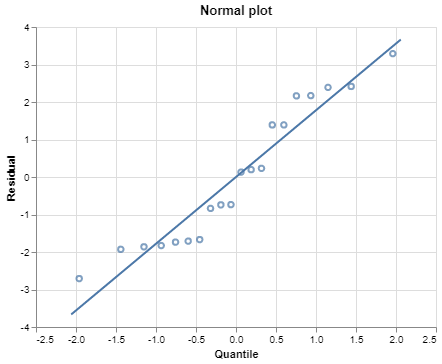

In [13]:
model.normal_plot()

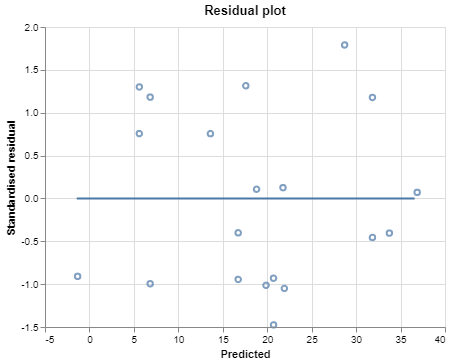

In [14]:
model.residual_plot()

In [15]:
model.residual()

array([-1.66990594,  1.38948678,  2.38948678, -1.82909815,  2.17090185,
        2.41561299,  0.19702806, -1.71031272, -2.71031272, -1.92889765,
        1.38922135, -1.73670437, -0.73670437, -1.86263008,  0.23002913,
        3.28942185, -0.83650387,  2.16349613, -0.74384466,  0.13022963])

In [16]:
model.std

array([[ 0.92307735, -0.08895685, -0.02476127],
       [-0.08895685,  0.0408743 , -0.03038883],
       [-0.02476127, -0.03038883,  0.03787018]])

In [17]:
model.vif('X1')

2.4789042345962757

# **Selection**

In [18]:
BackwardSelection(dm, ['X1', 'X2', 'X1c_0', 'X2c_0', 'X1c_0_X2', 'X1c_0_X2c_0', 'X2c_0_X1'], 'y')

Variable in model: X1, X2, X1c_0, X2c_0, X1c_0_X2, X1c_0_X2c_0, X2c_0_X1
Variable Removed                                       Res S.S. before Removal            Res S.S. after Removal
X1c_0_X2                                               36.4680                            38.2933        
Test Statistic: 0.6006186227063708
p-value: 0.45334338680270525
Decision: Remove
------------------------------------------------------------------------------------------------------------------------
Variable in model: X1, X2, X1c_0, X2c_0, X1c_0_X2c_0, X2c_0_X1
Variable Removed                                       Res S.S. before Removal            Res S.S. after Removal
X1                                                     38.2933                            42.7437        
Test Statistic: 1.5108485935660347
p-value: 0.24079436221619221
Decision: Remove
------------------------------------------------------------------------------------------------------------------------
Variable in model: X2,

In [19]:
ForwardSelection(dm, ['X1', 'X2', 'X1c_0', 'X2c_0', 'X1c_0_X2', 'X1c_0_X2c_0', 'X2c_0_X1'], 'y')

Variable in model: 
Variable Entered                                       Res S.S. before Entered            Res S.S. after Entered
X2                                                     2155.7500                          201.1942       
Test Statistic: 174.8659275755904
p-value: 1.0411016493350189e-10
Decision: Enter
------------------------------------------------------------------------------------------------------------------------
Variable in model: X2
Variable Entered                                       Res S.S. before Entered            Res S.S. after Entered
X1c_0                                                  201.1942                           54.0541        
Test Statistic: 46.275484271438
p-value: 3.0798272840915075e-06
Decision: Enter
------------------------------------------------------------------------------------------------------------------------
Variable in model: X2, X1c_0
Variable Entered                                       Res S.S. before Entered         

In [20]:
StepwiseSelection(dm, ['X1', 'X2', 'X1c_0', 'X2c_0', 'X1c_0_X2', 'X1c_0_X2c_0', 'X2c_0_X1'], 'y')

Variable in model: 
Variable Entered                                       Res S.S. before Entered            Res S.S. after Entered
X2                                                     2155.7500                          201.1942       
Test Statistic: 174.8659275755904
p-value: 1.0411016493350189e-10
Decision: Enter
------------------------------------------------------------------------------------------------------------------------
Variable in model: X2
Variable Entered                                       Res S.S. before Entered            Res S.S. after Entered
X1c_0                                                  201.1942                           54.0541        
Test Statistic: 46.275484271438
p-value: 3.0798272840915075e-06
Decision: Enter
------------------------------------------------------------------------------------------------------------------------
Variable in model: X2, X1c_0
Variable Removed                                       Res S.S. before Removal         